<a href="https://colab.research.google.com/github/Arina1308/Time-Series/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW4_unsolved_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 4: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 112kB 11.7MB/s 
     |████████████████████████████████| 9.5MB 19.3MB/s 
     |████████████████████████████████| 634kB 35.5MB/s 
     |████████████████████████████████| 11.6MB 34.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 184kB 22.2MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639482 sha256=82978666154f5f1dbca6d06ac94893448177dcab31971ec19111a914a0f00285
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
     |████████████████████████████████| 5.7MB 9.5MB/s 
     |████████████████████████████████| 22.3MB 2.4MB/s 
     |████████████████████████████████| 1.5MB 33.3MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 788kB 33.1MB/s 
     |█████████████████████

In [ ]:
%matplotlib inline

from IPython import display

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [ ]:
# скачаем данные
# !wget timeseries1_link
# !wget timeseries2_link
!git clone https://github.com/Arina1308/Time-Series

fatal: destination path 'Time-Series' already exists and is not an empty directory.


In [ ]:
# считаем файлы
ts11 = pd.read_csv('/content/Time-Series/DailyDelhiClimateTrain.csv')
ts12 = pd.read_csv('/content/Time-Series/DailyDelhiClimateTest.csv')
ts2 = pd.melt(pd.read_csv('/content/Time-Series/USUnemployment.csv'), id_vars='Year')

# приведем первый датасет к нужному виду
ts11['date'] = pd.to_datetime(ts11.date)
ts11.index = ts11.date
ts11.drop('date', axis=1, inplace=True)

ts12['date'] = pd.to_datetime(ts12.date)
ts12.index = ts12.date
ts12.drop('date', axis=1, inplace=True)

ts1 = pd.concat([ts11, ts12], axis=0)[['meantemp']]
ts1.index = pd.date_range(start = "2013-01-01", periods=len(ts1), freq="D")
# приведем второй датасет к нужному виду
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9,
       'Oct': 10, 'Nov': 11, 'Dec': 12}

ts2['month_num'] = ts2['variable'].apply(lambda x: months[x])

ts2['date'] = pd.to_datetime('1.' + ts2['month_num'].astype(str) + '.' + ts2['Year'].astype(str), dayfirst=True)
ts2 = ts2[['date', 'value']]
ts2.columns = ['date', 'unemployment']
ts2.sort_values('date', inplace=True)

ts2.index = ts2.date
ts2.drop('date', axis=1, inplace=True)
ts2.index = pd.date_range(start = "1948-01-01", periods=len(ts2), freq="M")

In [ ]:
ts1.head()

,meantemp
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [ ]:
ts2.head()

,unemployment
1948-01-31,3.4
1948-02-29,3.8
1948-03-31,4.0
1948-04-30,3.9
1948-05-31,3.5


In [ ]:
ts1_tr_len = round(ts1.shape[0]*0.8)
ts2_tr_len = round(ts2.shape[0]*0.8)

In [ ]:
# сделаем разбиение на train/test
ts1_tr = ts1[:ts1_tr_len]
ts1_test = ts1[ts1_tr_len:]

ts2_tr = ts2[:ts2_tr_len]
ts2_test = ts2[ts2_tr_len:]

## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

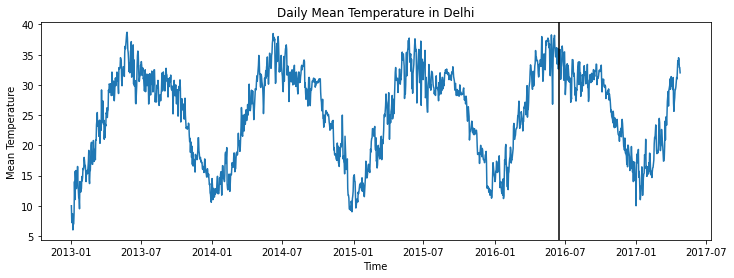

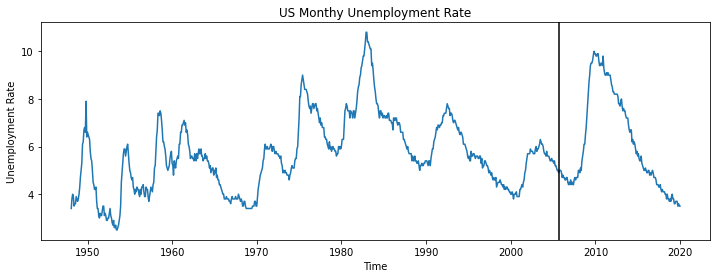

In [ ]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts1.index, ts1['meantemp'])
plt.axvline(x=ts1.index[ts1_tr_len], color='black')
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('Daily Mean Temperature in Delhi')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(ts2.index, ts2['unemployment'])
plt.axvline(x=ts2.index[ts2_tr_len], color='black')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.title('US Monthy Unemployment Rate')
plt.show()

In [ ]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')

from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

In [ ]:
ts1.meantemp

2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2017-04-21    34.500000
2017-04-22    34.250000
2017-04-23    32.900000
2017-04-24    32.875000
2017-04-25    32.000000
Freq: D, Name: meantemp, Length: 1576, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


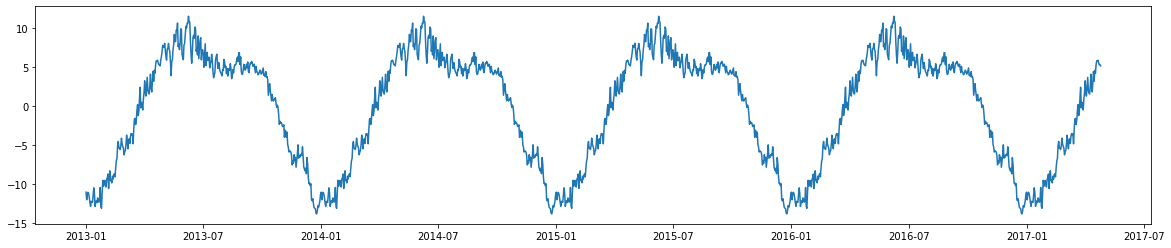

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition1 = seasonal_decompose(ts1.meantemp, model = "additive", freq=365)
seasonal1 = decomposition1.seasonal

plt.figure(figsize=(20, 4))
plt.plot(seasonal1)

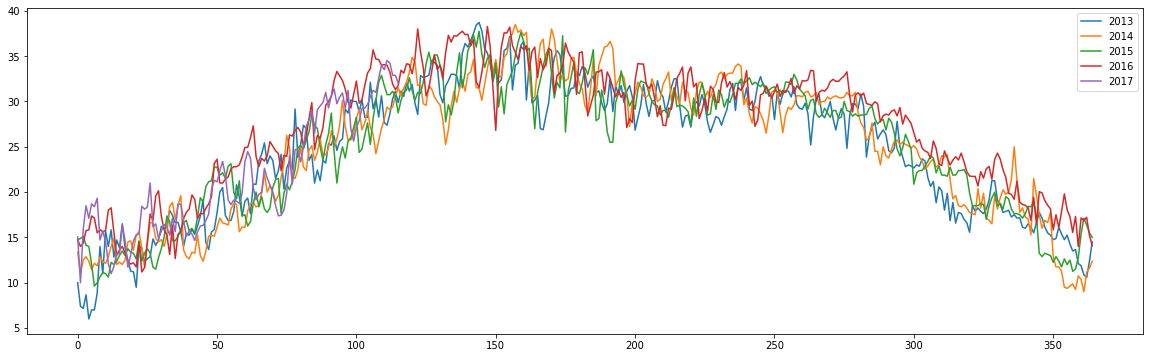

In [ ]:
i = 0
y = 0
ys = ts1.index.year.unique()
fig, ax = plt.subplots(figsize=(20, 6))
for d in range(365, len(ts1) + 365, 365):
  ax.plot(ts1['meantemp'][i:d].to_numpy(), label = str(ys[y]))
  ax.legend()
  i += 365
  y += 1
ax.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


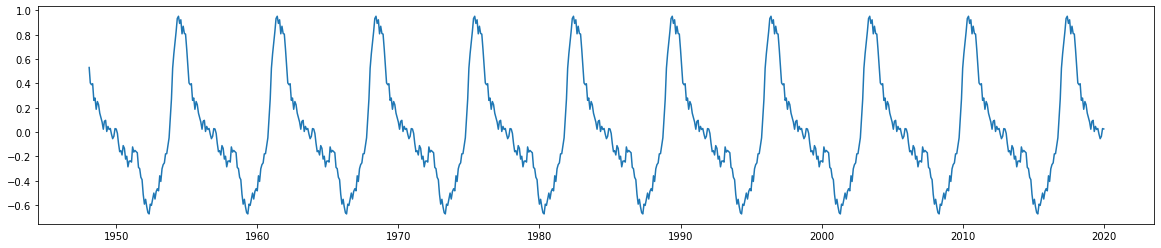

In [ ]:
decomposition2 = seasonal_decompose(ts2.unemployment, model = "additive", freq=12*7)
seasonal2 = decomposition2.seasonal

plt.figure(figsize=(20, 4))   
plt.plot(seasonal2)

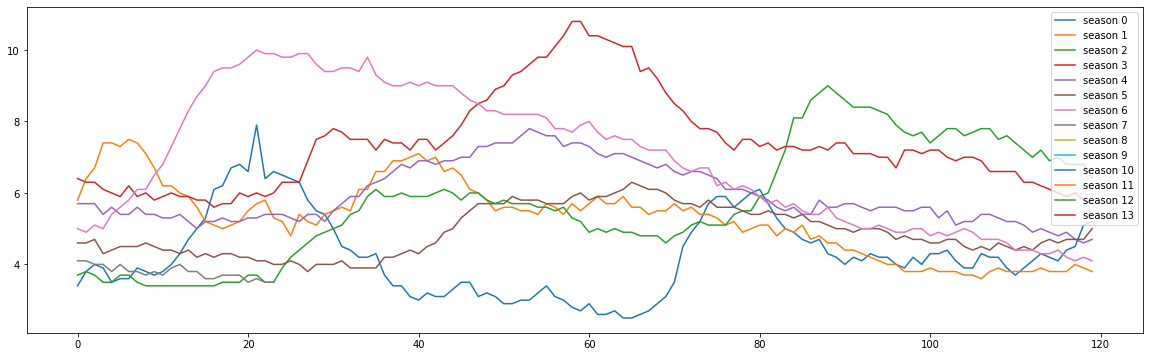

In [ ]:
i = 0
s = 0
fig, ax = plt.subplots(figsize=(20, 6))
for d in range(10*12, len(ts1) + 10*12, 10*12):
  ax.plot(ts2['unemployment'][i:d].to_numpy(), label = f'season {s}')
  ax.legend()
  s+=1
  i += 10*12
ax.legend()

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


In [ ]:
mae_df = pd.DataFrame(columns=['Model', 'MAE'])

### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
# ваш код обучения моделей здесь

 * $\hat{y}_{t+1} = y_{t}$

In [ ]:
forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(ts2_tr.unemployment)

NaiveForecaster(strategy='drift')

In [ ]:
fh = ForecastingHorizon(ts2_test.index, is_relative=False)
pred1 = forecaster.predict(fh)

In [ ]:
mae_df = mae_df.append({'Model': 'Naive Forecaster', 'MAE': mae(ts2_test.unemployment, pred1)}, ignore_index=True)
mae(ts2_test.unemployment, pred1)

1.7210471642791323

* $\hat{y}_{t+1} = y_{t-seasonality+1}$



In [ ]:
forecaster1 = NaiveForecaster(sp=10*12)
forecaster1.fit(ts2_tr.unemployment)

pred2 = forecaster1.predict(fh)

mae_df = mae_df.append({'Model': 'Seasonal Naive Forecaster', 'MAE': mae(ts2_test.unemployment, pred2)}, ignore_index=True)
mae(ts2_test.unemployment, pred2)

1.707514450867052

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

SARIMA(1, 1, 1)(1, 0, 0)[12] (ARIMA в sktime)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [ ]:
forecaster = ARIMA(
       order=(1, 1, 1),
       seasonal_order=(1, 0, 0, 12),
       suppress_warnings=True)
forecaster.fit(ts2_tr.unemployment, is_relative=False)
pred3 = forecaster.predict(fh)

In [ ]:
mae_df = mae_df.append({'Model': 'SARIMA', 'MAE': mae(ts2_test.unemployment, pred3)}, ignore_index=True)
mae(ts2_test.unemployment, pred3)

1.735555161739397

*Алгоритм* Хиндмана-Хандакара подбора SARIMA (AutoARIMA в sktime)

In [ ]:
# ваш код обучения моделей здесь

forecaster = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=2, max_d=1, max_q=0, 
                       start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, 
                       sp=12, suppress_warnings=True, stepwise=False, n_jobs=-1)

# обучение модели
forecaster.fit(ts2_tr.unemployment)
pred4, y_intervals = forecaster.predict(fh, return_pred_int=True)

In [ ]:
# посчитайте метрики на  test
mae_df = mae_df.append({'Model': 'Hyndman-Khandakar', 'MAE': mae(ts2_test.unemployment, pred4)}, ignore_index=True)
mae(ts2_test.unemployment, pred4)

1.9666657875210336

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull

In [ ]:
ts2_tr['date'] = ts2_tr.index
ts2_test['date'] = ts2_test.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# ваш код обучения моделей здесь
# инициализируем модель
dlt = DLTFull(
    response_col='unemployment', 
    date_col='date',
    seasonality=6*12,
)

# обучаем модель
dlt.fit(df=ts2_tr)

# делаем прогноз
predicted_df = dlt.predict(df=ts2_test)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [ ]:
# посчитайте метрики на test
# посчитайте метрики на  test
mae_df = mae_df.append({'Model': 'DLTFull', 'MAE': mae(ts2_test.unemployment, predicted_df.prediction)}, ignore_index=True)
mae(ts2_test.unemployment, predicted_df.prediction)

1.759536906171151

In [ ]:
lgt = LGTFull(
    response_col='unemployment', 
    date_col='date',
    seasonality=6*12,
)

# обучаем модель
lgt.fit(df=ts2_tr)

# делаем прогноз
pred_df = lgt.predict(df=ts2_test)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [ ]:
mae_df = mae_df.append({'Model': 'LGTFull', 'MAE': mae(ts2_test.unemployment, pred_df.prediction)}, ignore_index=True)
mae(ts2_test.unemployment, pred_df.prediction)

2.096709826996237

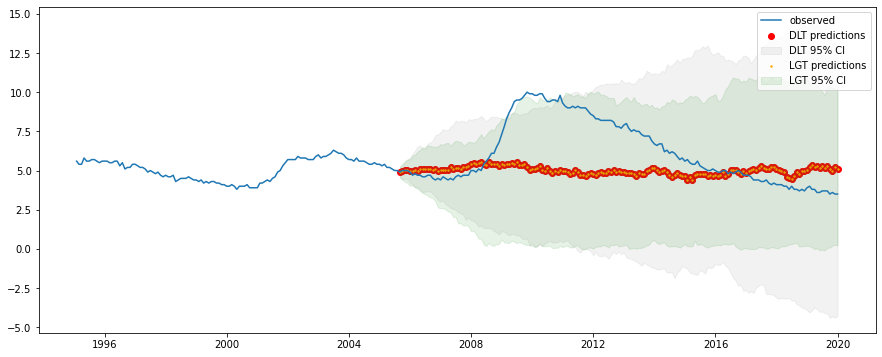

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(ts2.unemployment[-300:], label='observed')
ax.scatter(predicted_df.date, predicted_df.prediction, c='r', label='DLT predictions')
ax.fill_between(predicted_df.date, (predicted_df.prediction_5), (predicted_df.prediction_95), color='grey', alpha=0.1, label='DLT 95% CI')

ax.scatter(predicted_df.date, predicted_df.prediction, c='orange', label='LGT predictions', s=2)
ax.fill_between(pred_df.date, (pred_df.prediction_5), (pred_df.prediction_95), color='green', alpha=0.1, label='LGT 95% CI')
ax.legend()

### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
ts2_tr_ets = ts2_tr.copy()
ts2_tr_ets.index = pd.PeriodIndex(ts2_tr_ets.index)

ts2_test_ets = ts2_test.copy()
ts2_test_ets.index = pd.PeriodIndex(ts2_test_ets.index)

ETS(AAA) (`ExponentialSmoothing` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
ets = ExponentialSmoothing(trend='additive',
                           seasonal='additive',
                           sp=5*12)
ets.fit(ts2_tr_ets.unemployment)
pred5 = ets.predict(ForecastingHorizon(ts2_test_ets.index, is_relative=False))

In [ ]:
# посчитайте метрики на test
mae_df = mae_df.append({'Model': 'ETS(AAA)', 'MAE': mae(ts2_test.unemployment, pred5)}, ignore_index=True)
mae(ts2_test.unemployment, pred5)

6.46248285033355

ETS с автоматическим выбором по AIC (AutoETS в sktime)

In [ ]:
aets = AutoETS(auto=True, sp=12)
aets.fit(ts2_tr_ets.unemployment)
pred6 = aets.predict(ForecastingHorizon(ts2_test_ets.index, is_relative=False))

In [ ]:
mae_df = mae_df.append({'Model': 'AutoETS', 'MAE': mae(ts2_test.unemployment, pred6)}, ignore_index=True)
mae(ts2_test.unemployment, pred6)

1.7430625229788388

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [ ]:
# нарисуйте пресказания
mae_df

,Model,MAE
0,Naive Forecaster,1.721047
1,Seasonal Naive Forecaster,1.707514
2,SARIMA,1.735555
3,Hyndman-Khandakar,1.966666
4,DLTFull,1.759537
5,LGTFull,2.096710
6,ETS(AAA),6.462483
7,AutoETS,1.743063


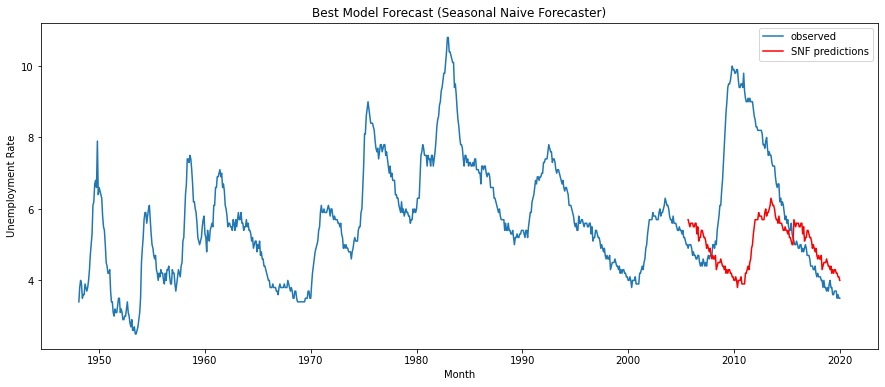

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(ts2.unemployment, label='observed')
ax.plot(pred2, c='r', label='SNF predictions')
ax.legend()
ax.set_title('Best Model Forecast (Seasonal Naive Forecaster)')
ax.set_xlabel('Month')
ax.set_ylabel('Unemployment Rate')
plt.show()

## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



In [ ]:
mae_df1 = pd.DataFrame(columns=['Model', 'MAE'])

### NaiveForecaster из sktime (0.5 балла).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
# ваш код обучения моделей здесь

* $\hat{y}_{t+1} = y_{t}$

In [ ]:
# посчитайте метрики на test
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(ts1_tr.meantemp)
pred1 = forecaster.predict(fh)

mae_df1 = mae_df1.append({'Model': 'Naive Forecaster', 'MAE': mae(ts1_test.meantemp, pred1)}, ignore_index=True)
mae(ts1_test.meantemp, pred1)

10.15643040829929

* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
forecaster = NaiveForecaster(sp=364)
forecaster.fit(ts1_tr.meantemp)
pred2 = forecaster.predict(fh)

mae_df1 = mae_df1.append({'Model': 'Seasonal Naive Forecaster', 'MAE': mae(ts1_test.meantemp, pred2)}, ignore_index=True)
mae(ts1_test.meantemp, pred2)

2.5004927814066167

### KTR из orbit (1 балл).



In [ ]:
ts1_test['date'] = ts1_test.index
ts1_tr['date'] = ts1_tr.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from orbit.models.ktrlite import KTRLiteMAP

# ваш код обучения моделей здесь
ktr = KTRLiteMAP(
    response_col='meantemp', 
    date_col='date',
    seasonality=364)

# обучаем модель
ktr.fit(df=ts1_tr)
pred3 = ktr.predict(df=ts1_test)['prediction']

# метрики
mae_df1 = mae_df1.append({'Model': 'KTRLiteMAP', 'MAE': mae(ts1_test.meantemp, pred3)}, ignore_index=True)
mae(ts1_test.meantemp, pred3)

1.941590785595873

### Phophet (1 балл).



In [ ]:
ts1_tr_pr = pd.DataFrame()
ts1_tr_pr['ds'] = ts1_tr.index
ts1_tr_pr['y'] = ts1_tr.meantemp.values

In [ ]:
ts1_test_pr = pd.DataFrame()
ts1_test_pr['ds'] = ts1_test.index
ts1_test_pr['y'] = np.nan

In [ ]:
from prophet import Prophet
# ваш код обучения моделей здесь
m = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
m.fit(ts1_tr_pr)
pred = m.predict(ts1_test_pr)

In [ ]:
mae_df1 = mae_df1.append({'Model': 'Prophet', 'MAE': mae(ts1_test.meantemp, pred.yhat)}, ignore_index=True)
mae(ts1_test.meantemp, pred.yhat)

2.739650638904445

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [ ]:
mae_df1

,Model,MAE
0,Naive Forecaster,10.156430
1,Seasonal Naive Forecaster,2.500493
2,KTRLiteMAP,1.941591
3,Prophet,2.739651


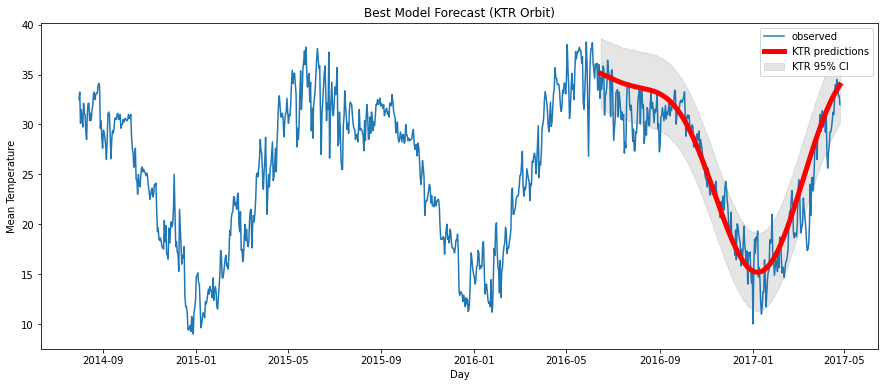

In [ ]:
# нарисуйте пресказания

ktr_df = ktr.predict(df=ts1_test)

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(ts1.meantemp[-1000:], label='observed')
ax.plot(ktr_df.date, ktr_df.prediction, c='r', linewidth=5, label='KTR predictions')
ax.fill_between(ktr_df.date, (ktr_df.prediction_5), (ktr_df.prediction_95), color='grey', alpha=0.2, label='KTR 95% CI')
ax.legend()

ax.set_title('Best Model Forecast (KTR Orbit)')
ax.set_xlabel('Day')
ax.set_ylabel('Mean Temperature')
plt.show()

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытай свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной на тестовой выборке с помощью MAE. 



In [ ]:
# ваш код модели на STAN и её обучения моделей здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте пресказания